# Chuẩn bị dữ liệu

In [8]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

# Loại bỏ những thông báo không cần thiết trong quá trình thực thi
warnings.filterwarnings('ignore')

# Load bộ dữ liệu vào biến 'data'
file_path = './social_media_data_1000 (1).csv'
data = pd.read_csv(file_path)

# Một số quan sát về dữ liệu

In [9]:
# Xem 5 dòng đầu dữ liệu
data.head()

,Post_ID,User_ID,Age,Gender,Post_Content,Likes,Shares,Comments,Post_Date
0,1,754,25,Male,Enjoying the weather,62,14,4,2024-09-24 03:43:00
1,2,858,52,Male,Watching a movie,108,2,0,2024-09-03 06:14:00
2,3,617,56,Male,Celebrating a birthday,50,45,20,2024-09-23 17:26:00
3,4,325,46,Female,Great day at the park,194,10,22,2024-09-14 10:17:00
4,5,259,31,Female,New blog post up!,23,24,3,2024-09-12 11:38:00


In [10]:
# Xem cấu trúc dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Post_ID       1000 non-null   int64 
 1   User_ID       1000 non-null   int64 
 2   Age           1000 non-null   int64 
 3   Gender        1000 non-null   object
 4   Post_Content  1000 non-null   object
 5   Likes         1000 non-null   int64 
 6   Shares        1000 non-null   int64 
 7   Comments      1000 non-null   int64 
 8   Post_Date     1000 non-null   object
dtypes: int64(6), object(3)
memory usage: 70.4+ KB


Nhận thấy ở đây vẫn còn một số thuộc tính có kiểu 'Object' (tức là cột vẫn chưa xác định được kiểu dữ liệu chuẩn), vì vậy ta sẽ tiến hành đặt lại kiểu dữ liệu cho các thuộc tính này bao gồm:
- 'Gender': chuyển về kiểu dữ liệu 'category', vì sẽ tối ưu vùng nhớ và cho tốc độ xử lý tốt hơn, phù hợp hơn với kiểu thuộc tính chỉ có vài loại giá trị.
- 'Post_Content': chuyển về kiểu 'str' cho loại dữ liệu văn bản.
- 'Post_Date': đưa về định dạng datetime tương ứng
> Mục đích khi chuẩn hóa kiểu dữ liệu là để đảm bảo tính đúng đắn và đầy đủ của dữ liệu, tạo điều kiện thuận lợi cho những phân tích có liên quan sau này.

In [14]:
# Chỉ định kiểu dữ liệu cho `Gender` và `Post_Content`
data['Gender'] = data['Gender'].astype('category')
data['Post_Content'] = data['Post_Content'].astype('string')
data['Post_Date'] = pd.to_datetime(data['Post_Date'])

In [22]:
# Xem thống kê tổng quát của một số thuộc tính
data.describe()

,Post_ID,User_ID,Age,Likes,Shares,Comments,Post_Date
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
mean,500.500000,602.233000,39.217000,103.040000,25.346000,14.814000,2024-09-17 04:44:00.420000
min,1.000000,100.000000,18.000000,0.000000,0.000000,0.000000,2024-09-01 00:09:00
25%,250.750000,365.750000,28.000000,51.000000,12.750000,7.000000,2024-09-09 23:51:15
50%,500.500000,594.000000,39.000000,107.000000,25.000000,15.000000,2024-09-17 13:13:30
75%,750.250000,853.000000,50.000000,154.250000,39.000000,22.000000,2024-09-24 11:36:15
max,1000.000000,1100.000000,60.000000,200.000000,50.000000,30.000000,2024-10-01 23:43:00
std,288.819436,288.982192,12.419829,58.970857,14.849943,8.787185,NaN


# Xây dựng một số hàm cần thiết cho việc phân tích

In [ ]:
# Hàm phân loại độ tuổi
def age_group(age):
    if 18 <= age < 31:
        return '18-30'
    elif 31 <= age < 41:
        return '31-40'
    elif 41 <= age < 51:
        return '41-50'
    elif 51 <= age <= 60:
        return '51-60'
    else:
        return 'Khác'  # Để xử lý các trường hợp ngoài phạm vi

# **YÊU CẦU 1: Xác định mối quan hệ giữa số lượt thích của một bài đăng và độ tuổi của người đăng**

Đầu tiên, để đơn giản hóa, ta có thể xem xét mối quan hệ trực tiếp giữa số lượt thích và độ tuổi sử dụng biểu đồ cột, biểu đồ hộp hay biểu đồ phân tán.

Giải thích lý do sử dụng các biểu đồ trên:
- Biểu đồ cột: đây là loại biểu đồ phù hợp khi hai thuộc tính đang xét có 1 loại là category (Age - vì có thể chia thành các nhóm tuổi) và 1 loại là numeric (Likes)

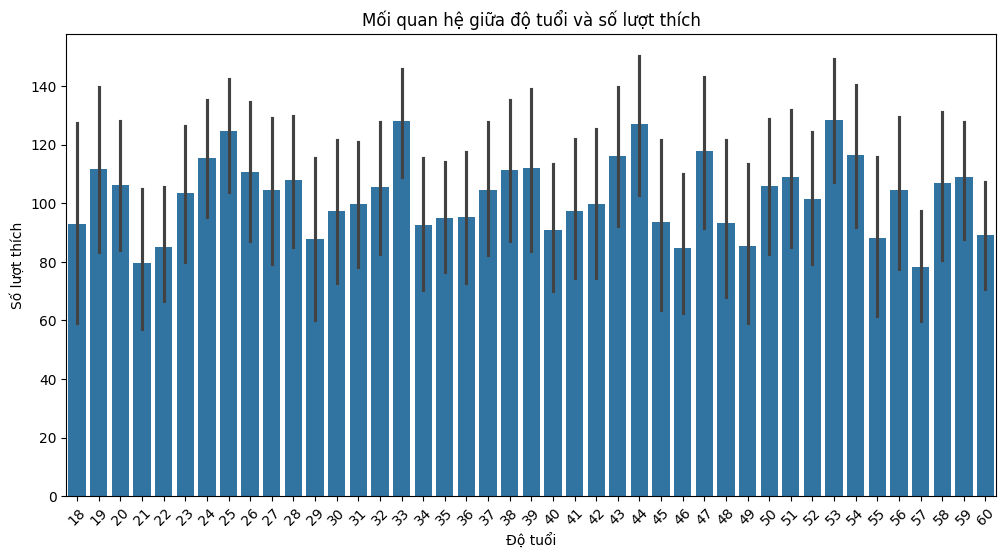

In [24]:
# Vẽ biểu đồ cột giữa độ tuổi và số lượt thích
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Likes', data=data)
plt.title('Mối quan hệ giữa độ tuổi và số lượt thích')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượt thích')
plt.xticks(rotation=45)
plt.show()